## Reading in the Datasets

In [2]:
# reading in articles.B2M.csv
import pandas as pd
from pathlib import Path

# adjust the path based on actual file location
articles = pd.read_csv('articles.B2M.csv')  

articles.head()

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation
0,10575721,[Computer-assisted preoperative planning of kn...,The general configuration of replaced knee is ...,0035-1040,Revue de chirurgie orthopedique et reparatrice...,(85) 591-600,1999,E,Nerkowski,E,"Equipe B2M, ENSAM, Aix-en-Provence."
1,10617805,[Urogenital amyloidosis: clinico-pathological ...,Amyloidosis of the genito-urinary tract is unc...,0242-6498,Annales de pathologie,(19) 487-91,1999,M,Esslimani,M,"Service d'Anatomie Pathologique, Hôpital Gui d..."
2,10656443,Serum beta-2 microglobulin levels are a signif...,Our objective was to investigate the prognosti...,1078-0432,Clinical cancer research : an official journal...,(6) 147-52,2000,J,Rodriguez,J,"Department of Leukemia, University of Texas M...."
3,10790290,Exposure of Daudi cells to low-frequency magne...,The effect of extremely low-frequency electrom...,0033-7587,Radiation research,(153) 663-9,2000,C A,Morehouse,CA,FDA Center for Devices and Radiological Health...
4,10793017,Effects of dialyzer reuse on the permeability ...,Little attention has been given to the effects...,1523-6838,American journal of kidney diseases : the offi...,(35) 839-44,2000,J P,Matos,JP,"Department of Internal Medicine, Division of N..."


In [3]:
# reading in authors.B2M.csv
authors = pd.read_csv('authors.B2M.csv')
authors.head()

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation
0,10575721,1,E,Nerkowski,E,"Equipe B2M, ENSAM, Aix-en-Provence."
1,10575721,2,P,Calas,P,NaN
2,10575721,3,A,Mouttet,A,NaN
3,10617805,1,M,Esslimani,M,"Service d'Anatomie Pathologique, Hôpital Gui d..."
4,10617805,2,I,Serre,I,NaN


In [4]:
# reading in paper_counts.csv
paper_counts = pd.read_csv('paper_counts.csv')
paper_counts.head()

,Year,Count
0,1799,1
1,1801,1
2,1802,1
3,1805,1
4,1866,1


## Initial Data Analysis

In [ ]:
# summary of columns in articles
articles.info()
# mostly non-null except for a few affiliations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   PMID                    665 non-null    int64 
 1   Title                   665 non-null    object
 2   Abstract                665 non-null    object
 3   ISSN                    665 non-null    object
 4   Journal                 665 non-null    object
 5   Location                665 non-null    object
 6   Year                    665 non-null    int64 
 7   FirstAuthorForename     665 non-null    object
 8   FirstAuthorLastname     665 non-null    object
 9   FirstAuthorInitials     665 non-null    object
 10  FirstAuthorAffiliation  659 non-null    object
dtypes: int64(2), object(9)
memory usage: 57.3+ KB


In [ ]:
authors.info()
# affiliations and a few initials are null - will need to drop these rows later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5797 entries, 0 to 5796
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PMID               5797 non-null   int64 
 1   AuthorN            5797 non-null   int64 
 2   AuthorForename     5796 non-null   object
 3   AuthorLastname     5797 non-null   object
 4   AuthorInitials     5793 non-null   object
 5   AuthorAffiliation  4422 non-null   object
dtypes: int64(2), object(4)
memory usage: 271.9+ KB


In [ ]:
paper_counts.info()
# all non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    143 non-null    int64
 1   Count   143 non-null    int64
dtypes: int64(2)
memory usage: 2.4 KB


## Most Active Researchers

Who appears the most in authors.csv?

In [14]:
# who appears most frequently as an author?
# will need to merge 'AuthorLastname' and 'AuthorInitials' columns to get full names
authors['FullName'] = authors['AuthorLastname'] + ', ' + authors['AuthorInitials']
author_totals = authors['FullName'].value_counts()

# using head() to see top 10 most frequent authors
author_totals.head(10)  

FullName
Wang, Y     17
Wang, X     16
Zhang, Y    13
Li, Y       13
Wang, J     12
Zhang, H    12
Wang, Z     10
Liu, Y       9
Li, L        9
Wang, Q      9
Name: count, dtype: int64

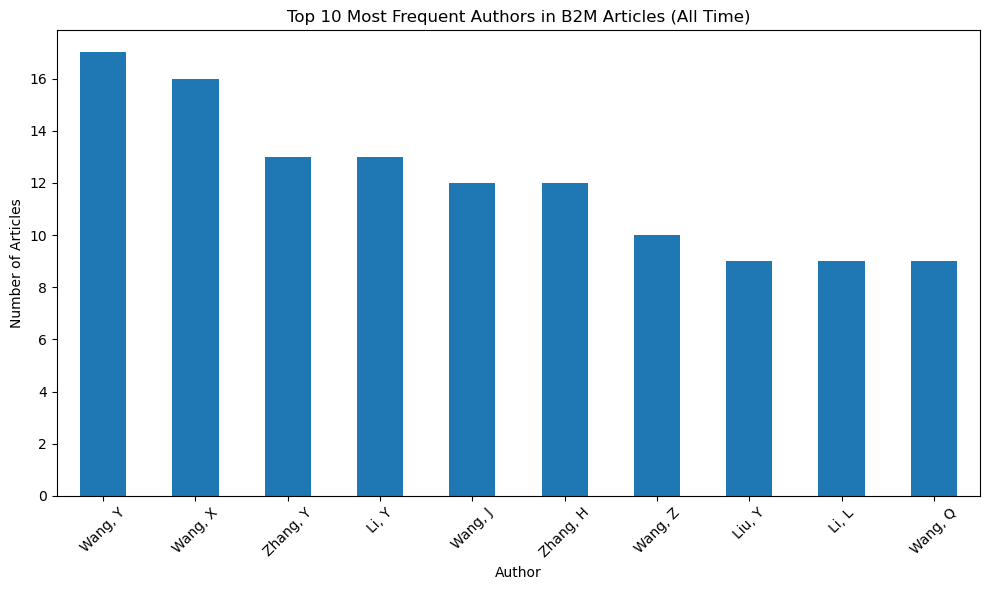

In [16]:
# plotting this data in a bar chart
import matplotlib.pyplot as plt
top_authors = author_totals.head(10)
top_authors.plot(kind='bar', figsize=(10,6))
plt.title('Top 10 Most Frequent Authors in B2M Articles (All Time)')
plt.xlabel('Author')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can compare this to how frequently each author appears since 2020 (regardless of authorship position).

'Year' is in 'articles.csv'.

In [17]:
# new dataframe with articles from 2020 onwards
recent_articles = articles[articles['Year'] >= 2020]
recent_articles.head()

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation
415,30862937,Towards precision medicine for stress disorder...,The biological fingerprint of environmental ad...,1476-5578,Molecular psychiatry,(25) 918-938,2020,H,Le-Niculescu,H,"Department of Psychiatry, Indiana University S..."
436,31425267,"Removal of Urea, β2-Microglobulin, and Indoxyl...","In this study, simultaneous removal assessment...",1538-943X,ASAIO journal (American Society for Artificial...,(66) 698-705,2020,Kai,Lauri,K,"From the Department of Health Technologies, Ta..."
451,31729180,Knockout of beta-2 microglobulin reduces stem ...,Generating universal human umbilical mesenchym...,1582-4934,Journal of cellular and molecular medicine,(24) 695-710,2020,Yuqing,Zhang,Y,Institute for Cardiovascular Science & Departm...
452,31733031,"Triple (GGTA1, CMAH, B2M) modified pigs expres...",Porcine xenografts lacking swine leukocyte ant...,1600-6143,American journal of transplantation : official...,(20) 988-998,2020,Rabea,Hein,R,"Transplant Laboratory, Department of General-,..."
453,31782146,New prognosis score including absolute lymphoc...,The International Prognostic Index (IPI) is th...,1365-2141,British journal of haematology,(188) 888-897,2020,Leyre,Bento,L,"Hospital Universitario Son Espases, IdISBa, Pa..."


In [18]:
# new dataframe from authors where PMID is in recent_articles
recent_authors = authors[authors['PMID'].isin(recent_articles['PMID'])]
recent_authors.head()

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,FullName
3239,30862937,1,H,Le-Niculescu,H,"Department of Psychiatry, Indiana University S...","Le-Niculescu, H"
3240,30862937,2,K,Roseberry,K,"Department of Psychiatry, Indiana University S...","Roseberry, K"
3241,30862937,3,D F,Levey,DF,"Department of Psychiatry, Indiana University S...","Levey, DF"
3242,30862937,4,J,Rogers,J,"Department of Psychiatry, Indiana University S...","Rogers, J"
3243,30862937,5,K,Kosary,K,"Department of Psychiatry, Indiana University S...","Kosary, K"


In [19]:
# counting most frequent authors in recent_articles
recent_author_totals = recent_authors['FullName'].value_counts()
recent_author_totals.head(10)

FullName
Wang, X     9
Li, Y       8
Zhang, H    7
Wang, Z     7
Wang, J     7
Wang, Y     7
Li, L       6
Zhou, Y     6
Zhang, Y    6
Zhang, X    5
Name: count, dtype: int64

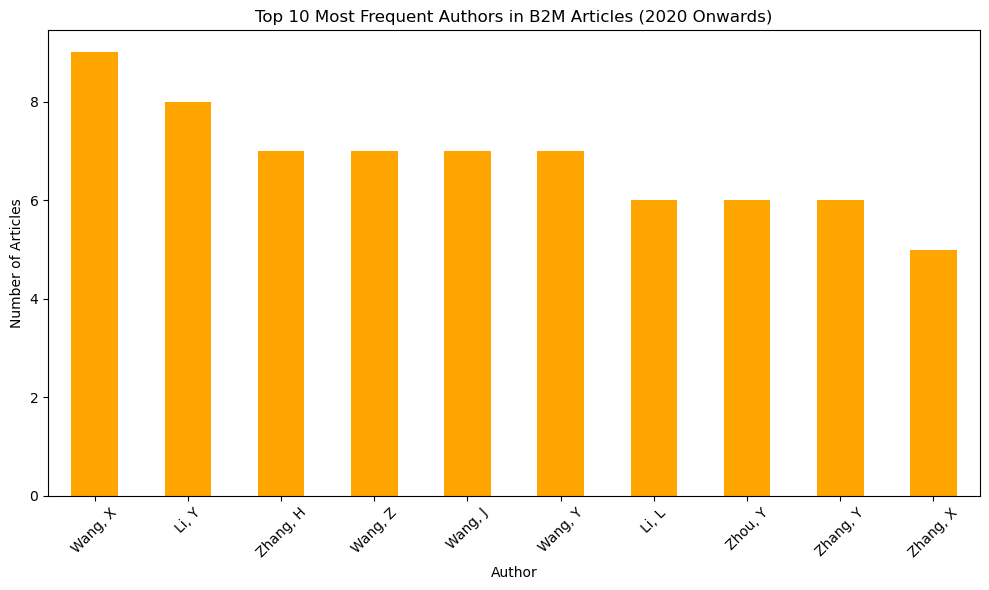

In [20]:
# plotting the top 10 recent authors
top_recent_authors = recent_author_totals.head(10)
top_recent_authors.plot(kind='bar', figsize=(10,6), color='orange')
plt.title('Top 10 Most Frequent Authors in B2M Articles (2020 Onwards)')
plt.xlabel('Author')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()